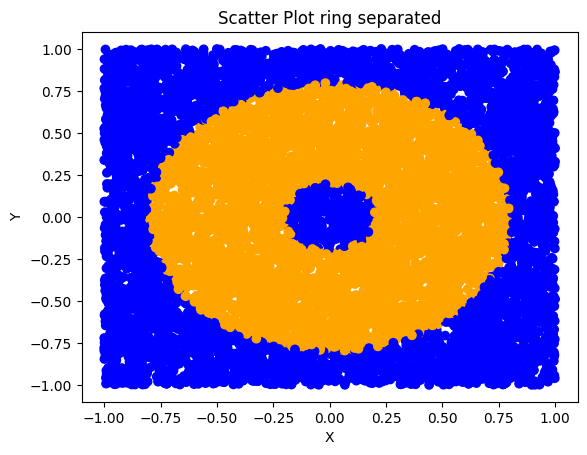

In [124]:
###··· RING SEPARATED DATASET ···### 
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import *

# Part 1: Selecting and analyzing the dataset 
# #Load the dataset
ring_separated = pd.read_csv("A2-ring\A2-ring-separable.txt", sep='\t', header=None)
ring_separated.columns = ["X", "Y", "Result"]
# Select the first two columns
x_t_sep = ring_separated[["X", "Y"]]
y_t_sep = ring_separated[["Result"]]

ring_test = pd.read_csv("A2-ring\A2-ring-test.txt", sep='\t', header=None)
ring_test.columns = ["X", "Y", "Result"]
x_v = ring_test[["X", "Y"]]
y_v = ring_test[["Result"]]

# Scale the dat
scaler = MinMaxScaler()
x_t_s_scaled = scaler.fit_transform(x_t_sep)
x_v_scaled = scaler.fit_transform(x_v)

plt.scatter(x_t_sep["X"], x_t_sep["Y"], c=y_t_sep["Result"].map({0: 'blue', 1: 'orange'}), marker="o")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot ring separated")
plt.show()


In [125]:
# Part 2: Implementation of NN
from tensorflow import keras as keras
from sklearn.model_selection import KFold
from matplotlib import pyplot as plt

# Define the number of folds for cross-validation
n_splits = 5

# Create a KFold object
kf = KFold(n_splits=n_splits)

# Initialize lists to store the training and validation accuracies for each fold
train_accuracies = []
val_accuracies = []

# Perform cross-validation
for train_index, val_index in kf.split(x_t_s_scaled):
    # Split the data into training and validation sets
    x_train, x_val = x_t_s_scaled[train_index], x_t_s_scaled[val_index]
    y_train, y_val = y_t_sep.iloc[train_index], y_t_sep.iloc[val_index]

    # Create the model
    model = keras.models.Sequential([
        keras.layers.Dense(10, input_shape=(x_train.shape[1],), activation='tanh'),
        keras.layers.Dense(5, activation='tanh'),
        keras.layers.Dense(1, activation='sigmoid')
    ])
    optimizer = keras.optimizers.Adam(learning_rate=0.01, ema_momentum=0.5)
    model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=optimizer)
    # Train the model
    history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=2)

    # Store the training and validation accuracies for this fold
    train_accuracies.append(history.history['accuracy'][-1])
    val_accuracies.append(history.history['val_accuracy'][-1])

# Plot the training and validation accuracies for each fold
plt.plot(range(1, n_splits + 1), train_accuracies, marker='o', label='Train')
plt.plot(range(1, n_splits + 1), val_accuracies, marker='o', label='Validation')
plt.title('Model accuracy (Cross-Validation)')
plt.ylabel('Accuracy')
plt.xlabel('Fold')
plt.legend()
plt.show()

Epoch 1/50
250/250 - 2s - loss: 0.6137 - accuracy: 0.6747 - val_loss: 0.5407 - val_accuracy: 0.7250 - 2s/epoch - 9ms/step
Epoch 2/50
250/250 - 1s - loss: 0.4648 - accuracy: 0.8043 - val_loss: 0.4081 - val_accuracy: 0.8505 - 750ms/epoch - 3ms/step
Epoch 3/50
250/250 - 1s - loss: 0.3663 - accuracy: 0.8811 - val_loss: 0.3497 - val_accuracy: 0.8920 - 711ms/epoch - 3ms/step
Epoch 4/50
250/250 - 1s - loss: 0.3313 - accuracy: 0.8964 - val_loss: 0.3237 - val_accuracy: 0.8665 - 764ms/epoch - 3ms/step
Epoch 5/50
250/250 - 1s - loss: 0.3077 - accuracy: 0.9089 - val_loss: 0.3090 - val_accuracy: 0.8775 - 788ms/epoch - 3ms/step
Epoch 6/50
250/250 - 1s - loss: 0.2904 - accuracy: 0.9193 - val_loss: 0.2734 - val_accuracy: 0.9350 - 815ms/epoch - 3ms/step
Epoch 7/50
250/250 - 1s - loss: 0.2710 - accuracy: 0.9360 - val_loss: 0.2565 - val_accuracy: 0.9405 - 820ms/epoch - 3ms/step
Epoch 8/50
250/250 - 1s - loss: 0.2584 - accuracy: 0.9366 - val_loss: 0.2471 - val_accuracy: 0.9500 - 795ms/epoch - 3ms/step
Epo

---Test---
Accuracy Score:  0.9503
---Train---
Accuracy Score:  0.9465
[[4812  521]
 [  14 4653]]


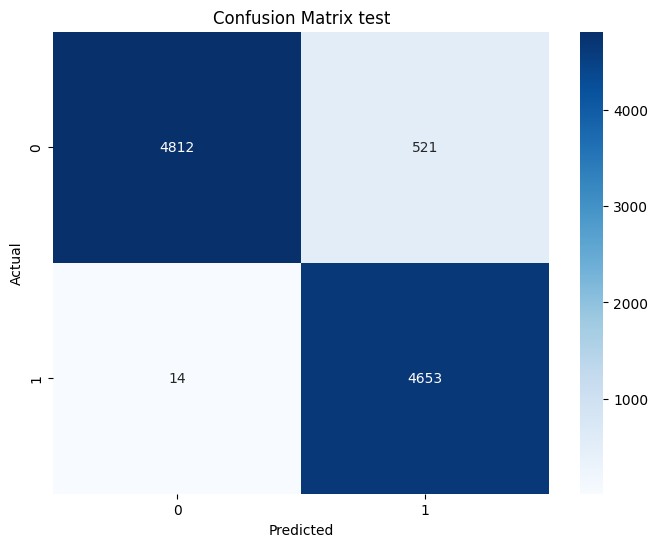

In [100]:
from sklearn.metrics import *
from matplotlib import pyplot as plt
from seaborn import heatmap
from sklearn.metrics import confusion_matrix
import numpy as np

# Part 3: Obtaining predictions
y_pred_train = (model.predict(x_t_s_scaled, verbose=0)[:, 0] > 0.5).astype(np.int8)
y_pred_test = (model.predict(x_v_scaled, verbose=0)[:, 0] > 0.5).astype(np.int8)
print("---Test---")
print("Accuracy Score: ", accuracy_score(y_t_sep, y_pred_train))
print("---Train---")
print("Accuracy Score: ", accuracy_score(y_v, y_pred_test))

# Generate the confusion matrix

confusion = confusion_matrix(y_v, y_pred_test, labels=[0, 1])
print(confusion)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
heatmap(confusion, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix test')
plt.show()


